# Conservación del momento lineal:
## A) Introducción
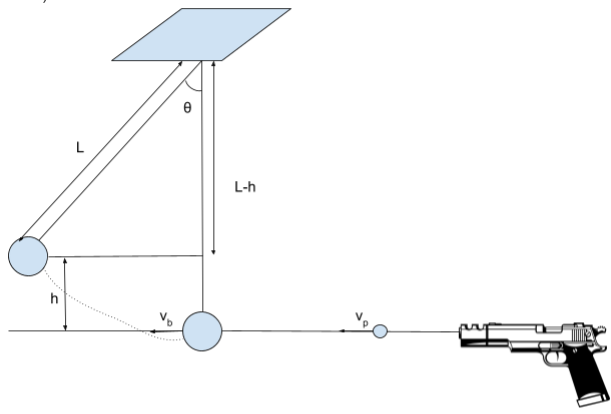

El principio de conservación del momento lineal, también conocido como principio de
conservación de la cantidad de movimiento, establece que si la resultante de las fuerzas
que actúan sobre un cuerpo o sistema es nula, su momento lineal permanece constante en
el tiempo.

$$
\Sigma F = 0 \Rightarrow p = c onstante
$$
Por lo tanto, sustituyendo en la ecuación del momento lineal, p = m · v , y considerando que
el perdigón se queda dentro de la bola, obtenemos:
$$
m_p · v_p = (m_b + m_p ) · v_b
$$
Actuando sólo fuerzas conservativas (gravedad), aplicamos el teorema de la conservación
de la energía mecánica:
Actuando sólo fuerzas conservativas (gravedad), aplicamos el teorema de la conservación
de la energía mecánica:
$$
\Delta E_m = \Delta E_c +  \Delta E_p
$$
y obtenemos:

$$
E_{cb} = 21 (m_b + m_p ) · v_b^2 = (m_b + m_p ) · g · h
$$
$$
cos\Theta =\frac{L−h}{L} 
=
1 − \frac{h}{L}
= 
L · (1 − cos\Theta)
$$

$$
E_p = (m_b + m_p ) · g · h = (m_b + m_p ) · g · L · (1 − cos\Theta)
$$

$$
v_p =\sqrt{\frac{(m_b +m_p )·g·L·(1−cos\Theta)}{1/2·(m_b +m_p )}}
=
\sqrt{2·g·L·(1−cos\Theta)}
$$

$$
v_p=\frac{(m_b +m_p)v_b}{m_p}=\frac{m_b+m_p}{m_p}\sqrt{2·g·L·(1−cos\Theta)}
$$

$$
l=2L2L\Theta(rad)=\frac{L\pi}{45}(^o)
$$
Inserto tablas con los cálculos a partir de los datos obtenidos experimentalmente al final.

# Dinamica del pendulo


Se muestrea la amplitud de la oscilacion en el tiempo  $\Theta_t$, calculandose el resto de parametros indicados en la grafica

- $\Theta_t$.- parametro muestrado
- $E_p(J)=0.2745*9.8*1.844*(1-cos\Theta)$
- $l(m)=2*1.844*2*\frac{\pi}{180}\Theta$
- $v_m(m/s)=\frac{l}{\Delta T_{i-i_{-1}}}$
- $F_r(N)=\frac{E_p}{l}$


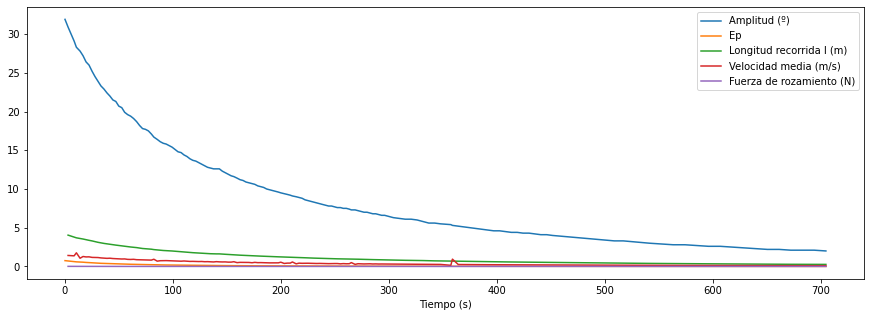

In [1]:
# pip install openpyxl
import pandas as pd # Pandas hace el truco, funciona como excel
from numpy import * #
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

#  carga el excel
df = pd.read_excel("Fisica Péndulo.xlsx")
df=df[['Amplitud (º)','Tiempo (s)','kT']]
# df['kT']=df[0:109]=1,df[:138],df[:150]
# calculo de cada una de las variables

df['Ep']=0.2745*9.8*1.844*(1-cos(pi/180*df['Amplitud (º)']))
df['d_Ep']=-df['Ep'].diff()
df['Longitud recorrida l (m)']=2*1.844*2*pi/180*df['Amplitud (º)'].rolling(2).mean()
df['Periodo T (s)']=df['Tiempo (s)'].diff()/df.kT
df['Velocidad media (m/s)']=df['Longitud recorrida l (m)']/df['Periodo T (s)']
df['Fuerza de rozamiento (N)']=df['d_Ep']/df['Longitud recorrida l (m)']
# variables par la grafica
yy=['Amplitud (º)','Ep','Longitud recorrida l (m)','Velocidad media (m/s)','Fuerza de rozamiento (N)']
figura=df.plot(kind="line",y=yy,x='Tiempo (s)',figsize=(15, 5))

## B) Gráficas de aproximación por mínimo cuadrados. velocidad - rozamiento
Gráficos desde 32o a 5o.

### orden=1

[ 0.00553909 -0.00066887] 0.7147810046415413


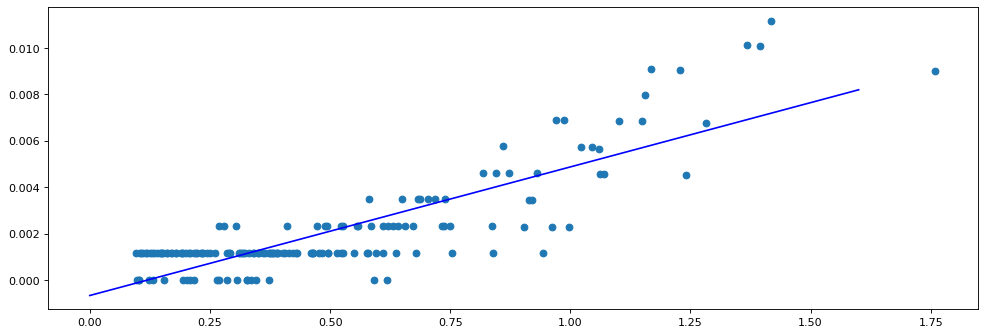

In [8]:
orden=1
df=df.dropna()
y=df['Fuerza de rozamiento (N)'].values
x=df['Velocidad media (m/s)'].values

model = np.polyfit(x, y, orden)
predict = np.poly1d(model)
r2=r2_score(y, predict(x))
# Prediccion
x_lin_reg = np.arange(0, max(x), 0.2)
y_lin_reg = predict(x_lin_reg)
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ax = plt.scatter(x, y)
ax = plt.plot(x_lin_reg, y_lin_reg, c = 'b')
print(model,r2)

### orden=2

[ 0.00416584 -0.00013137  0.00066312] 0.7872864043700604


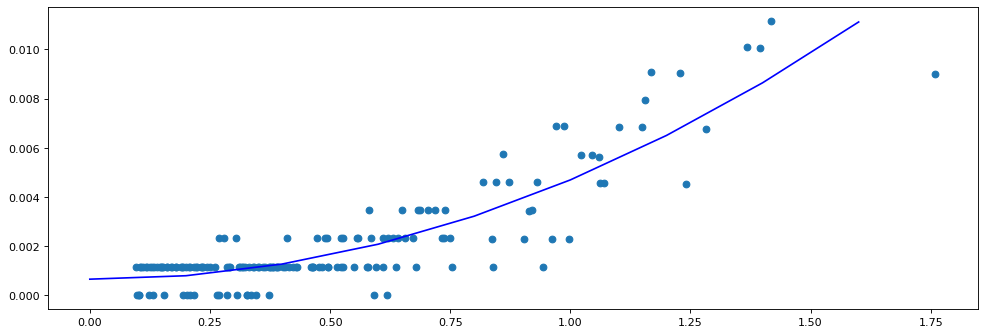

In [9]:
orden=2
df=df.dropna()
y=df['Fuerza de rozamiento (N)'].values
x=df['Velocidad media (m/s)'].values

model = np.polyfit(x, y, orden)
predict = np.poly1d(model)
r2=r2_score(y, predict(x))
# Prediccion
x_lin_reg = np.arange(0, max(x), 0.2)
y_lin_reg = predict(x_lin_reg)
figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

ax = plt.scatter(x, y)
ax = plt.plot(x_lin_reg, y_lin_reg, c = 'b')
print(model,r2)

In [10]:
df

,Amplitud (º),Tiempo (s),kT,Ep,d_Ep,media_movil,Longitud recorrida l (m),Periodo T (s),Velocidad media (m/s),Fuerza de rozamiento (N)
1,30.9,2.85,1,0.704075,0.045107,31.40,4.042294,2.8500,1.418349,0.011159
2,30.0,5.66,1,0.664587,0.039488,30.45,3.919996,2.8100,1.395016,0.010074
3,29.1,8.44,1,0.626158,0.038428,29.55,3.804134,2.7800,1.368393,0.010102
4,28.3,10.54,1,0.592897,0.033261,28.70,3.694708,2.1000,1.759385,0.009002
5,27.8,13.95,1,0.572541,0.020356,28.05,3.611030,3.4100,1.058953,0.005637
...,...,...,...,...,...,...,...,...,...,...
159,2.2,661.20,4,0.003656,-0.000000,2.20,0.283218,2.7450,0.103176,-0.000000
160,2.1,671.84,4,0.003332,0.000325,2.15,0.276781,2.6600,0.104053,0.001174
161,2.1,682.48,4,0.003332,-0.000000,2.10,0.270345,2.6600,0.101633,-0.000000
162,2.1,693.53,4,0.003332,-0.000000,2.10,0.270345,2.7625,0.097862,-0.000000
